## Health Insurance Data
### EDA - Exploratory Data Analysis

The goal of an EDA is to make raw graphs to understand the data. The "pretty" graphs come later, in this case, the most interesting ones they will be implemented in Tableau.

#### 1. Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

#### 2. Read Data (sourced from Kaggle)

In [4]:
df = pd.read_csv('../data/insurance.csv')

#### 3. Crude Graphs

You will notice that there are some correlation scores. Two metrics were used, Spearman and Pearson, where the first is more suitable for the analysis of relationships that are not strictly linear or when the data is ranked rather than measured directly.

For example, you might have a variable like "smoker" that is boolean, meaning it only has two possible values, such as "yes" or "no" (or 1 and 0). When you compare a boolean variable to a numerical one (like insurance charges), the Pearson correlation tells you how strongly and in what direction the two are related in a straight-line (linear) way. The Spearman correlation does something similar, but it looks at whether, as one variable increases, the other tends to increase or decrease, regardless of the exact shape of the relationship.

A correlation score close to 1 means a strong positive relationship (as one goes up, so does the other), close to -1 means a strong negative relationship (as one goes up, the other goes down), and close to 0 means little or no relationship. These scores help us understand how much one variable might influence or be associated with another, even if one of them is just a simple yes/no choice.

Median charges by smoker status:
 smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64


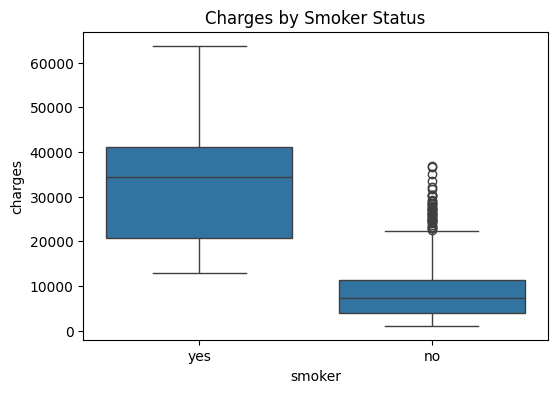

In [5]:
# Smoker Status Drives Costs

plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.savefig('../images/charges_by_smoker.png', bbox_inches='tight')

median_charges = df.groupby('smoker')['charges'].median()
print("Median charges by smoker status:\n", median_charges)

Smoker Status Drives Costs
Smokers face dramatically higher charges, median costs are more than the triple of those of non-smokers.

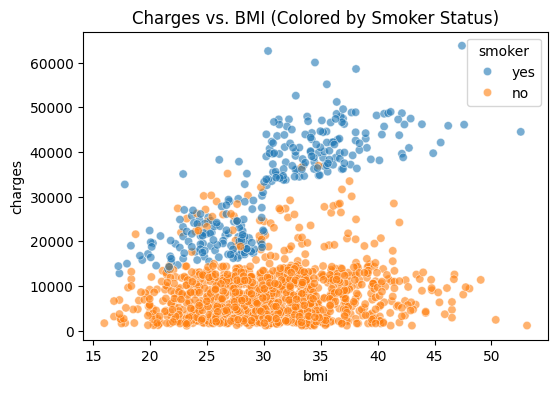

In [44]:
# BMI and Charges
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title('Charges vs. BMI (Colored by Smoker Status)')
plt.savefig('../images/charges_vs_bmi_smoker.png', bbox_inches='tight')

BMI and Charges
The correlation between BMI and charges seem low but when compared with high BMI and being a smoker it rises significantly, suggesting compounding health risks.

In [6]:
# Calculate Pearson correlation coefficient and p-value for BMI and charges
correlation, p_value = pearsonr(df['bmi'], df['charges'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.19834096883362887
P-value: 2.459085535116776e-13


In [ ]:
# Calculate Pearson correlation coefficient and p-value for smoker status and charges
correlation, p_value = spearmanr(df['smoker'], df['charges'])
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.6634600597131323
P-value: 1.6347637541775159e-170


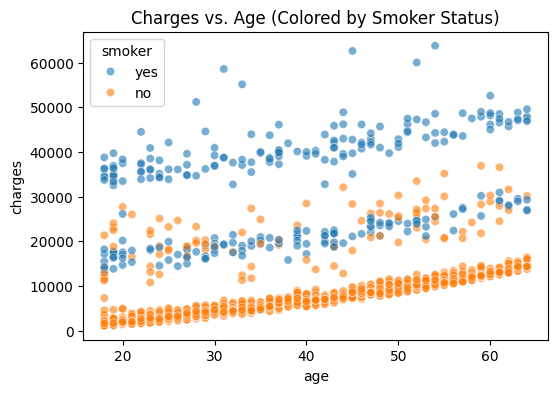

In [45]:
# Age and Charges
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title('Charges vs. Age (Colored by Smoker Status)')
plt.savefig('../images/charges_vs_age_smoker.png', bbox_inches='tight')

In [10]:
# Calculate Pearson correlation coefficient and p-value for Age and charges
correlation, p_value = pearsonr(df['age'], df['charges'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.29900819333064754
P-value: 4.886693331718663e-29


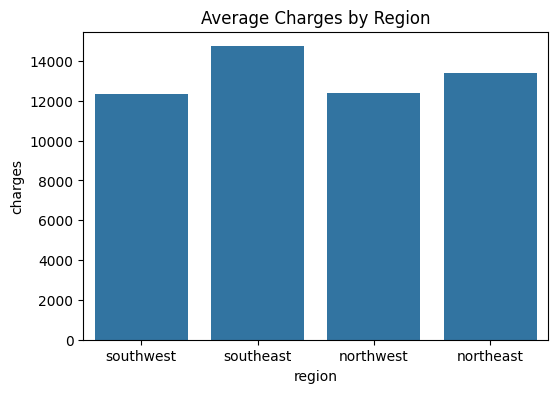

In [46]:
# Regional Differences
plt.figure(figsize=(6,4))
sns.barplot(x='region', y='charges', data=df, estimator='mean', errorbar=None)
plt.title('Average Charges by Region')
plt.savefig('../images/charges_by_region.png', bbox_inches='tight')

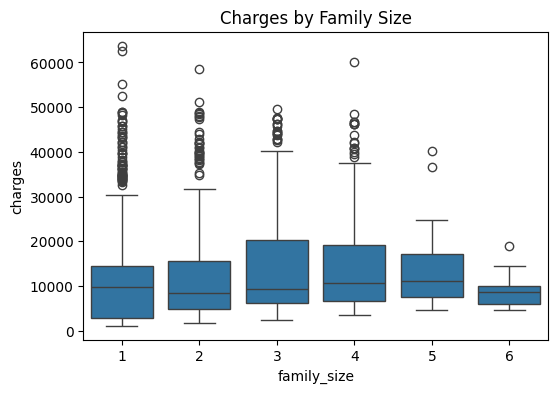

In [47]:
# Family Size Impact
df['family_size'] = df['children'] + 1  # +1 for the insured
plt.figure(figsize=(6,4))
sns.boxplot(x='family_size', y='charges', data=df)
plt.title('Charges by Family Size')
plt.savefig('../images/charges_by_family_size.png', bbox_inches='tight')

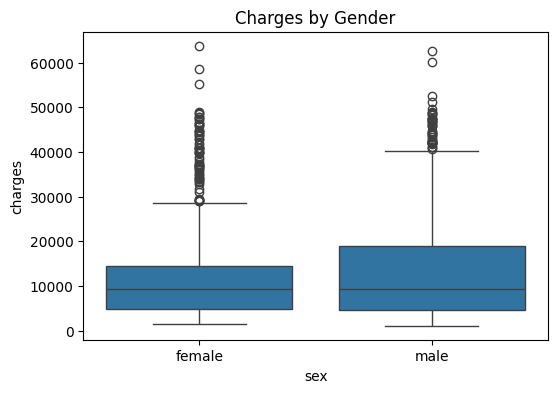

In [48]:
# Gender and Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')
plt.savefig('../images/charges_by_gender.png', bbox_inches='tight')

In [11]:
# Calculate Spearman correlation coefficient and p-value for gender and charges
correlation, p_value = spearmanr(df['bmi'], df['charges'])
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient: 0.11939590358331145
P-value: 1.1926059544526874e-05


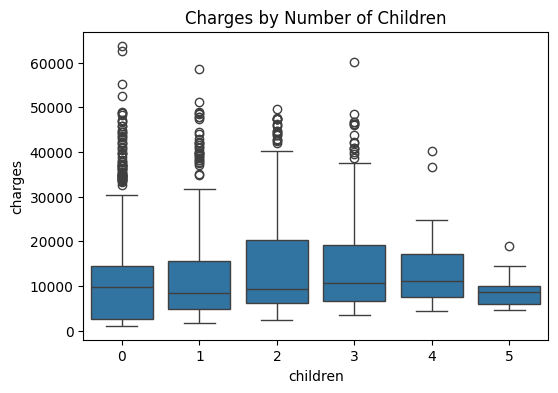

In [49]:
# Children and Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges by Number of Children')
plt.savefig('../images/charges_by_children.png', bbox_inches='tight')

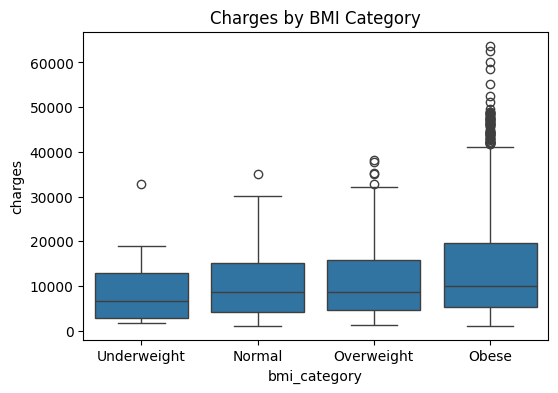

In [50]:
# BMI Categories and Charges
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)
plt.figure(figsize=(6,4))
sns.boxplot(x='bmi_category', y='charges', data=df)
plt.title('Charges by BMI Category')
plt.savefig('../images/charges_by_bmi_category.png', bbox_inches='tight')

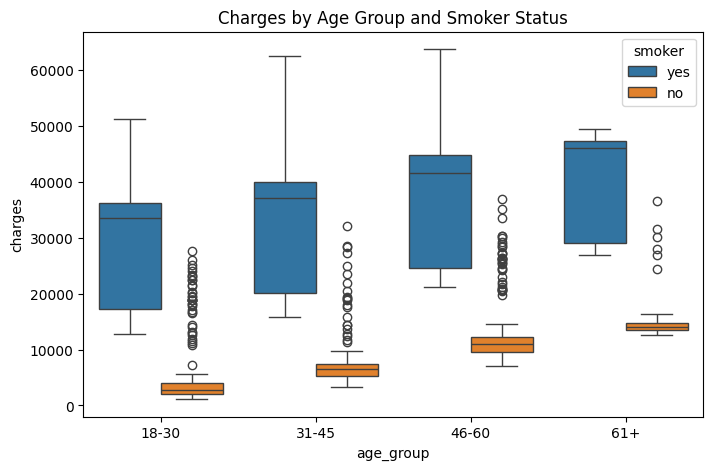

In [51]:
# Interaction: Smoking Effect by Age Group
age_bins = [17, 30, 45, 60, 100]
age_labels = ['18-30', '31-45', '46-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='charges', hue='smoker', data=df)
plt.title('Charges by Age Group and Smoker Status')
plt.savefig('../images/charges_by_agegroup_smoker.png', bbox_inches='tight')

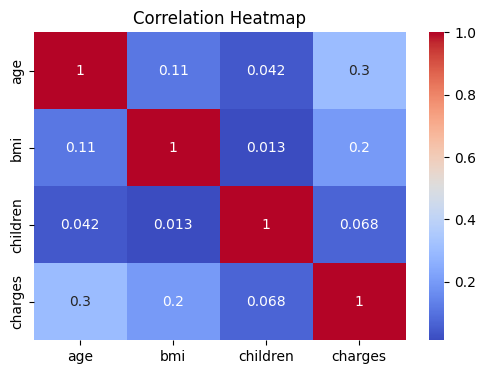

In [52]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png', bbox_inches='tight')

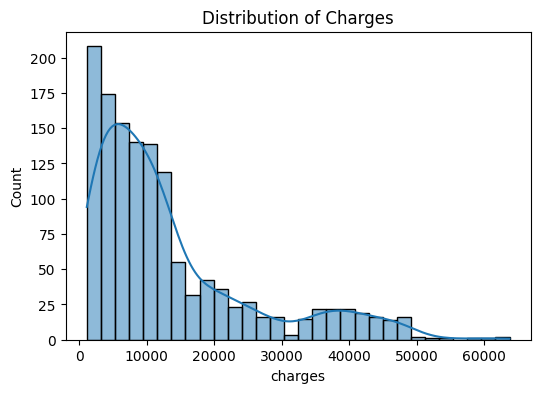

In [53]:
# Distribution Plots
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.savefig('../images/distribution_charges.png', bbox_inches='tight')

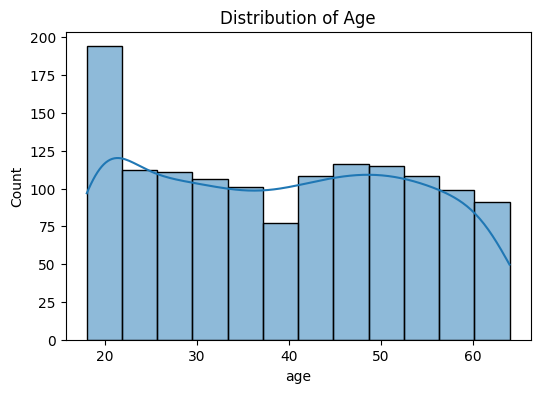

In [54]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.savefig('../images/distribution_age.png', bbox_inches='tight')

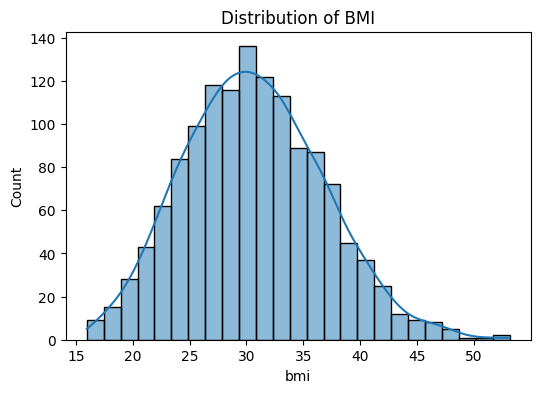

In [55]:

plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.savefig('../images/distribution_bmi.png', bbox_inches='tight')


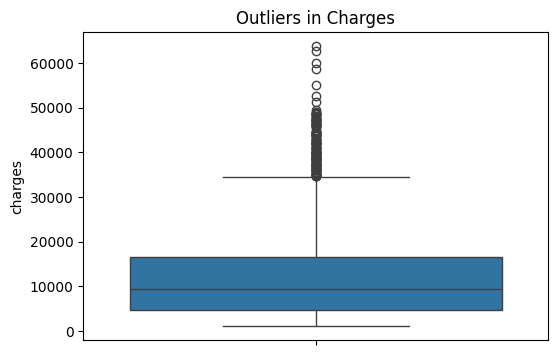

In [56]:

# Outlier Detection for Charges
plt.figure(figsize=(6,4))
sns.boxplot(y='charges', data=df)
plt.title('Outliers in Charges')
plt.savefig('../images/outliers_charges.png', bbox_inches='tight')


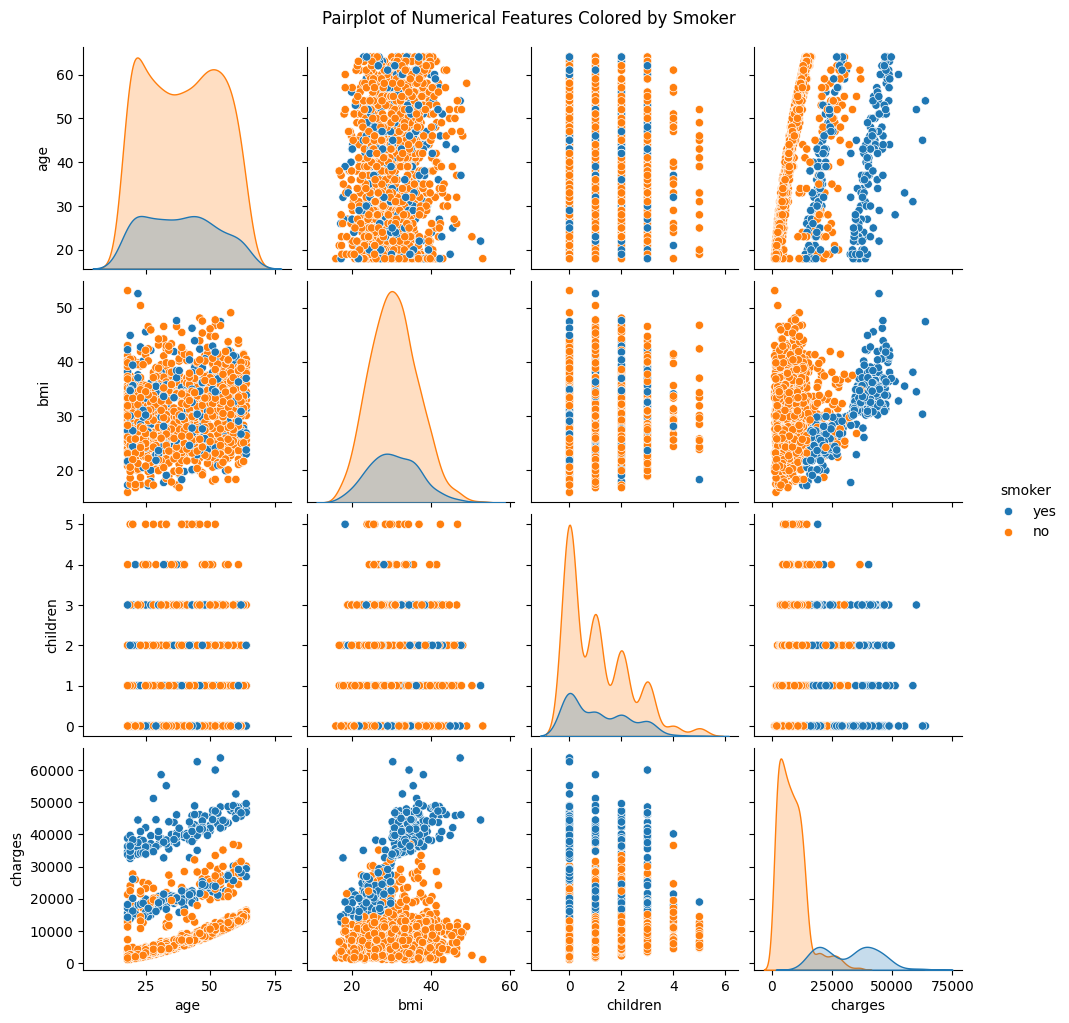

In [57]:

# Pairplot of Numerical Features
sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker')
plt.suptitle('Pairplot of Numerical Features Colored by Smoker', y=1.02)
plt.savefig('../images/pairplot_numerical_features.png', bbox_inches='tight')